In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# List of all of the data the model is going to use
deprivation_2015 = pd.read_parquet("./processed_data/filtered_deprivation_2015.parquet") # done
deprivation_2019 = pd.read_parquet("./processed_data/deprivation_index_2019.parquet") # done
street = gpd.read_parquet("./processed_data/street.parquet") # done
busy = pd.read_parquet("./processed_data/busy_with_lsoa.parquet") # done

lsoa_data_filtered = pd.read_parquet("./processed_data/filtered_converted_lsoa_data.parquet")
lsoa_data2_filtered = pd.read_parquet("./processed_data/filtered_processed_lsoa_data2.parquet")


In [2]:
# use the deprivation 2015 as a base file

merge_df = deprivation_2015
merge_df

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Rank (where 1 is most deprived),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Rank (where 1 is most deprived)","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Health Deprivation and Disability Rank (where 1 is most deprived),Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs),Crime Rank (where 1 is most deprived),Crime Decile (where 1 is most deprived 10% of LSOAs),Barriers to Housing and Services Rank (where 1 is most deprived),Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs),Living Environment Rank (where 1 is most deprived),Living Environment Decile (where 1 is most deprived 10% of LSOAs)
0,E01000027,Barking and Dagenham 001A,E09000002,Barking and Dagenham,3.924,2,3.530,2,6.518,2,3.828,2,8.060,3,1.592,1,3.054,1,16.620,6
1,E01000028,Barking and Dagenham 001B,E09000002,Barking and Dagenham,3.617,2,2.540,1,4.211,2,9.352,3,1.744,1,12.893,4,2.512,1,20.318,7
2,E01000029,Barking and Dagenham 001C,E09000002,Barking and Dagenham,9.890,4,13.523,5,14.189,5,14.483,5,14.024,5,2.282,1,1.717,1,15.264,5
3,E01000030,Barking and Dagenham 001D,E09000002,Barking and Dagenham,4.130,2,2.853,1,6.305,2,5.743,2,10.294,4,4.184,2,1.427,1,13.365,5
4,E01000031,Barking and Dagenham 002A,E09000002,Barking and Dagenham,10.820,4,13.154,5,12.500,4,19.106,6,16.658,6,889.000,1,9.476,3,10.770,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01004669,Westminster 024B,E09000033,Westminster,4.405,2,3.565,2,5.758,2,14.341,5,7.619,3,11.296,4,912.000,1,3.347,2
4831,E01004737,Westminster 024C,E09000033,Westminster,13.031,4,11.504,4,13.939,5,23.213,8,18.436,6,14.224,5,5.747,2,5.408,2
4832,E01004738,Westminster 024D,E09000033,Westminster,18.644,6,26.307,9,29.450,9,32.625,10,28.335,9,8.308,3,7.747,3,847.000,1
4833,E01004739,Westminster 024E,E09000033,Westminster,21.239,7,25.331,8,30.324,10,32.348,10,22.225,7,25.616,8,5.927,2,2.185,1


In [3]:
merge_df = merge_df.drop(columns=['Local Authority District code (2013)', 'LSOA name (2011)', 'Local Authority District name (2013)'])
merge_df = merge_df.drop(columns=['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Income Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Employment Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Crime Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs)'])
merge_df = merge_df.drop(columns=['Living Environment Decile (where 1 is most deprived 10% of LSOAs)'])

merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived)
0,E01000027,3.924,3.530,6.518,3.828,8.060,1.592,3.054,16.620
1,E01000028,3.617,2.540,4.211,9.352,1.744,12.893,2.512,20.318
2,E01000029,9.890,13.523,14.189,14.483,14.024,2.282,1.717,15.264
3,E01000030,4.130,2.853,6.305,5.743,10.294,4.184,1.427,13.365
4,E01000031,10.820,13.154,12.500,19.106,16.658,889.000,9.476,10.770
...,...,...,...,...,...,...,...,...,...
4830,E01004669,4.405,3.565,5.758,14.341,7.619,11.296,912.000,3.347
4831,E01004737,13.031,11.504,13.939,23.213,18.436,14.224,5.747,5.408
4832,E01004738,18.644,26.307,29.450,32.625,28.335,8.308,7.747,847.000
4833,E01004739,21.239,25.331,30.324,32.348,22.225,25.616,5.927,2.185


In [4]:
if not 'date' in merge_df.columns:
    # Add same data until and not including 01-2021
    merge_df['date'] = '01-2015'
    merge_df['date'] = pd.to_datetime(merge_df['date'], format='%m-%Y')

    
    start_date = merge_df['date'].min()
    end_date = pd.to_datetime('01-2019', format='%m-%Y')
    
    all_months = pd.date_range(start=start_date, end=end_date, freq='MS', inclusive='left')
    
    extended_dfs = []
    
    for month in all_months:
        temp_df = merge_df.copy()
        temp_df['date'] = month
        extended_dfs.append(temp_df)
    
    merge_df = pd.concat(extended_dfs, ignore_index=True)

merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date
0,E01000027,3.924,3.530,6.518,3.828,8.060,1.592,3.054,16.620,2015-01-01
1,E01000028,3.617,2.540,4.211,9.352,1.744,12.893,2.512,20.318,2015-01-01
2,E01000029,9.890,13.523,14.189,14.483,14.024,2.282,1.717,15.264,2015-01-01
3,E01000030,4.130,2.853,6.305,5.743,10.294,4.184,1.427,13.365,2015-01-01
4,E01000031,10.820,13.154,12.500,19.106,16.658,889.000,9.476,10.770,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
232075,E01004669,4.405,3.565,5.758,14.341,7.619,11.296,912.000,3.347,2018-12-01
232076,E01004737,13.031,11.504,13.939,23.213,18.436,14.224,5.747,5.408,2018-12-01
232077,E01004738,18.644,26.307,29.450,32.625,28.335,8.308,7.747,847.000,2018-12-01
232078,E01004739,21.239,25.331,30.324,32.348,22.225,25.616,5.927,2.185,2018-12-01


In [5]:
# Only keep the rows relevant to London

# Get the unique Lsoa codes from merge_df
lsoa_codes_to_keep = merge_df['LSOA code (2011)'].unique()

deprivation_2019_filtered = deprivation_2019[deprivation_2019['lsoa code'].isin(lsoa_codes_to_keep)]
deprivation_2019_filtered = deprivation_2019_filtered.reset_index().drop(columns='index')

deprivation_2019_filtered

,lsoa code,lsoa name,lsoa name (full),st_areasha,st_lengths,IMD_Rank,IMD_Decile,LSOA01NM,LADcd,LADnm,...,IndRank,IndDec,OutScore,OutRank,OutDec,TotPop,DepChi,Pop16_59,Pop60+,WorkPop
0,E01000001,City of London 001A,City of London 001A,"133320,76","2291,84","29199,00","9,00",City of London 001A,E09000001,City of London,...,"16364,00","5,00","1,50","1615,00","1,00","1296,00","175,00","656,00","465,00","715,00"
1,E01000002,City of London 001B,City of London 001B,"226191,27","2433,96","30379,00","10,00",City of London 001B,E09000001,City of London,...,"22676,00","7,00","1,19","2969,00","1,00","1156,00","182,00","580,00","394,00","619,75"
2,E01000003,City of London 001C,City of London 001C,"57302,96","1142,35","14915,00","5,00",City of London 001C,E09000001,City of London,...,"17318,00","6,00","2,20","162,00","1,00","1350,00","146,00","759,00","445,00","804,00"
3,E01000005,City of London 001E,City of London 001E,"190738,76","2167,86","8678,00","3,00",City of London 001E,E09000001,City of London,...,"25218,00","8,00","1,76","849,00","1,00","1121,00","229,00","692,00","200,00","683,00"
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"144195,84","1935,51","14486,00","5,00",Barking and Dagenham 016A,E09000002,Barking and Dagenham,...,"14745,00","5,00","0,96","4368,00","2,00","2040,00","522,00","1297,00","221,00","1284,50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,Greenwich 007F,"123309,18","1860,31","20945,00","7,00",Greenwich 007F,E09000011,Greenwich,...,"31989,00","10,00","0,70","6423,00","2,00","1701,00","323,00","1219,00","159,00","1210,00"
4831,E01033743,Greenwich 002H,Greenwich 002H,"1004853,08","5237,18","13578,00","5,00",Greenwich 002H,E09000011,Greenwich,...,"30238,00","10,00","0,55","7843,00","3,00","2426,00","766,00","1519,00","141,00","1471,25"
4832,E01033744,Greenwich 007G,Greenwich 007G,"152261,99","2149,37","8319,00","3,00",Greenwich 007G,E09000011,Greenwich,...,"28696,00","9,00","0,70","6408,00","2,00","1900,00","501,00","1224,00","175,00","1210,00"
4833,E01033745,Greenwich 002I,Greenwich 002I,"558477,70","4193,82","12697,00","4,00",Greenwich 002I,E09000011,Greenwich,...,"31779,00","10,00","0,91","4699,00","2,00","1954,00","631,00","1195,00","128,00","1182,75"


In [6]:
# Prepare to merge
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['lsoa name', 'lsoa name (full)', 'st_areasha', 'st_lengths'])
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['LSOA01NM', 'LADcd', 'LADnm'])
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['WorkPop', 'Pop60+', 'Pop16_59'])
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['DepChi', 'TotPop', 'IMDRank0'])
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['IDCRank', 'IDORank', 'CYPRank'])
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['ASRank', 'GBRank', 'WBRank'])
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=['IndRank', 'OutRank'])

columns_to_drop = [col for col in deprivation_2019_filtered.columns if 'Dec' in col]
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=columns_to_drop)

columns_to_drop = [col for col in deprivation_2019_filtered.columns if 'Score' in col]
deprivation_2019_filtered = deprivation_2019_filtered.drop(columns=columns_to_drop)

deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'lsoa code': 'LSOA code (2011)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'IMD_Rank': 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'IncRank': 'Income Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'EmpRank': 'Employment Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'EduRank': 'Education, Skills and Training Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'HDDRank': 'Health Deprivation and Disability Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'CriRank': 'Crime Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'BHSRank': 'Barriers to Housing and Services Rank (where 1 is most deprived)'})
deprivation_2019_filtered = deprivation_2019_filtered.rename(columns={'EnvRank': 'Living Environment Rank (where 1 is most deprived)'})
deprivation_2019_filtered['date'] = '01-2019'
deprivation_2019_filtered['date'] = pd.to_datetime(deprivation_2019_filtered['date'], format='%m-%Y')

for col in deprivation_2019_filtered.columns:
    if 'Rank' in col:
        deprivation_2019_filtered[col] = deprivation_2019_filtered[col].astype(str).str.replace(',00', '', regex=False)
        
deprivation_2019_filtered

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date
0,E01000001,29199,32831,32742,32842,32113,32662,7319,7789,2019-01-01
1,E01000002,30379,29901,31190,32832,29705,32789,11707,13070,2019-01-01
2,E01000003,14915,18510,15103,26386,17600,29363,2157,4092,2019-01-01
3,E01000005,8678,6029,7833,12370,17907,31059,2217,9397,2019-01-01
4,E01000006,14486,14023,21692,17511,21581,18848,1033,10629,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,20945,19844,27920,24139,22041,19491,2042,21492,2019-01-01
4831,E01033743,13578,12244,21210,22640,19077,13267,286,22054,2019-01-01
4832,E01033744,8319,7767,9762,15227,5225,10943,3095,19969,2019-01-01
4833,E01033745,12697,10101,13403,22088,19154,20703,1047,19362,2019-01-01


In [7]:
merge_df['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'] = merge_df['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Income Rank (where 1 is most deprived)'] = merge_df['Income Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Employment Rank (where 1 is most deprived)'] = merge_df['Employment Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Education, Skills and Training Rank (where 1 is most deprived)'] = merge_df['Education, Skills and Training Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Health Deprivation and Disability Rank (where 1 is most deprived)'] = merge_df['Health Deprivation and Disability Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Crime Rank (where 1 is most deprived)'] = merge_df['Crime Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Barriers to Housing and Services Rank (where 1 is most deprived)'] = merge_df['Barriers to Housing and Services Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df['Living Environment Rank (where 1 is most deprived)'] = merge_df['Living Environment Rank (where 1 is most deprived)'].astype(str).str.replace('.', '', regex=False)
merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date
0,E01000027,3924,353,6518,3828,806,1592,3054,1662,2015-01-01
1,E01000028,3617,254,4211,9352,1744,12893,2512,20318,2015-01-01
2,E01000029,989,13523,14189,14483,14024,2282,1717,15264,2015-01-01
3,E01000030,413,2853,6305,5743,10294,4184,1427,13365,2015-01-01
4,E01000031,1082,13154,125,19106,16658,8890,9476,1077,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
232075,E01004669,4405,3565,5758,14341,7619,11296,9120,3347,2018-12-01
232076,E01004737,13031,11504,13939,23213,18436,14224,5747,5408,2018-12-01
232077,E01004738,18644,26307,2945,32625,28335,8308,7747,8470,2018-12-01
232078,E01004739,21239,25331,30324,32348,22225,25616,5927,2185,2018-12-01


In [8]:
merge_df = pd.concat([merge_df, deprivation_2019_filtered])
merge_df = merge_df.reset_index(drop=True)
merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date
0,E01000027,3924,353,6518,3828,806,1592,3054,1662,2015-01-01
1,E01000028,3617,254,4211,9352,1744,12893,2512,20318,2015-01-01
2,E01000029,989,13523,14189,14483,14024,2282,1717,15264,2015-01-01
3,E01000030,413,2853,6305,5743,10294,4184,1427,13365,2015-01-01
4,E01000031,1082,13154,125,19106,16658,8890,9476,1077,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
236910,E01033742,20945,19844,27920,24139,22041,19491,2042,21492,2019-01-01
236911,E01033743,13578,12244,21210,22640,19077,13267,286,22054,2019-01-01
236912,E01033744,8319,7767,9762,15227,5225,10943,3095,19969,2019-01-01
236913,E01033745,12697,10101,13403,22088,19154,20703,1047,19362,2019-01-01


In [9]:
for col in merge_df.columns:
    if 'Rank' in col:
        merge_df[col] = merge_df[col].astype(int)
        
merge_df['LSOA code (2011)'] = merge_df['LSOA code (2011)'].astype('string')        
merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date
0,E01000027,3924,353,6518,3828,806,1592,3054,1662,2015-01-01
1,E01000028,3617,254,4211,9352,1744,12893,2512,20318,2015-01-01
2,E01000029,989,13523,14189,14483,14024,2282,1717,15264,2015-01-01
3,E01000030,413,2853,6305,5743,10294,4184,1427,13365,2015-01-01
4,E01000031,1082,13154,125,19106,16658,8890,9476,1077,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
236910,E01033742,20945,19844,27920,24139,22041,19491,2042,21492,2019-01-01
236911,E01033743,13578,12244,21210,22640,19077,13267,286,22054,2019-01-01
236912,E01033744,8319,7767,9762,15227,5225,10943,3095,19969,2019-01-01
236913,E01033745,12697,10101,13403,22088,19154,20703,1047,19362,2019-01-01


In [10]:
merge_df.dtypes

LSOA code (2011)                                                       string[python]
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)             int64
Income Rank (where 1 is most deprived)                                          int64
Employment Rank (where 1 is most deprived)                                      int64
Education, Skills and Training Rank (where 1 is most deprived)                  int64
Health Deprivation and Disability Rank (where 1 is most deprived)               int64
Crime Rank (where 1 is most deprived)                                           int64
Barriers to Housing and Services Rank (where 1 is most deprived)                int64
Living Environment Rank (where 1 is most deprived)                              int64
date                                                                   datetime64[ns]
dtype: object

In [11]:
# now we add street

street = street.drop(columns=['Crime ID', 'Reported by', 'Falls within', 'Location', 'Last outcome category', 'geometry'])
street

,LSOA code,period
0,W01000936,2021-01
1,E01022243,2020-06
2,E01014704,2017-08
3,E01029225,2022-03
4,E01032645,2023-01
...,...,...
999758,E01024561,2019-04
999759,E01024126,2022-08
999760,E01022045,2020-02
999761,E01024683,2017-01


In [12]:
street = street.groupby(['LSOA code', 'period'], observed=True).size().reset_index(name='Burglaries amount')
street.head(10)

,LSOA code,period,Burglaries amount
0,E01000001,2011-06,1
1,E01000001,2011-08,1
2,E01000001,2011-12,2
3,E01000001,2012-01,1
4,E01000001,2012-03,2
5,E01000001,2012-05,1
6,E01000001,2012-06,1
7,E01000001,2012-07,8
8,E01000001,2012-09,1
9,E01000001,2012-10,1


In [13]:
# Only keep the rows relevant to London

# Get the unique Lsoa codes from merge_df
lsoa_column = 'LSOA code (2011)' if 'LSOA code (2011)' in merge_df.columns else 'LSOA21CD'

street = street[street['LSOA code'].isin(lsoa_codes_to_keep)]
street = street.reset_index().drop(columns='index')

street

,LSOA code,period,Burglaries amount
0,E01000001,2011-06,1
1,E01000001,2011-08,1
2,E01000001,2011-12,2
3,E01000001,2012-01,1
4,E01000001,2012-03,2
...,...,...,...
497467,E01033746,2023-12,1
497468,E01033746,2024-01,1
497469,E01033746,2024-02,1
497470,E01033746,2024-09,1


In [14]:
street['period'].max()

Period('2025-03', 'M')

In [15]:
df_lookup = pd.read_csv('./data/LSOA_(2011)_to_LSOA_(2021)_Exact_Fit_Lookup_for_EW_(V3).csv')
changed = df_lookup.drop(columns=['LAD22CD', 'LAD22NM', 'LAD22NMW', 'ObjectId', 'LSOA11NM', 'LSOA21NM'])
df_lookup = df_lookup.drop(columns=['CHGIND', 'LAD22CD', 'LAD22NM', 'LAD22NMW', 'ObjectId', 'LSOA11NM', 'LSOA21NM'])
df_lookup

,LSOA11CD,LSOA21CD
0,E01031349,E01031349
1,E01031350,E01031350
2,E01031351,E01031351
3,E01031352,E01031352
4,E01031370,E01031370
...,...,...
35791,E01013336,E01013336
35792,E01013337,E01013337
35793,E01013338,E01013338
35794,E01013339,E01013339


In [16]:
merge_df = pd.merge(merge_df, df_lookup,
                     left_on='LSOA code (2011)',
                     right_on='LSOA11CD',
                     how='left')
merge_df = merge_df.drop(columns=['LSOA11CD'])
merge_df = merge_df.rename(columns={'LSOA21CD': 'LSOA code (2021)'})
merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021)
0,E01000027,3924,353,6518,3828,806,1592,3054,1662,2015-01-01,E01000027
1,E01000028,3617,254,4211,9352,1744,12893,2512,20318,2015-01-01,E01000028
2,E01000029,989,13523,14189,14483,14024,2282,1717,15264,2015-01-01,E01000029
3,E01000030,413,2853,6305,5743,10294,4184,1427,13365,2015-01-01,E01000030
4,E01000031,1082,13154,125,19106,16658,8890,9476,1077,2015-01-01,E01000031
...,...,...,...,...,...,...,...,...,...,...,...
245779,E01033742,20945,19844,27920,24139,22041,19491,2042,21492,2019-01-01,E01033742
245780,E01033743,13578,12244,21210,22640,19077,13267,286,22054,2019-01-01,E01033743
245781,E01033744,8319,7767,9762,15227,5225,10943,3095,19969,2019-01-01,E01033744
245782,E01033745,12697,10101,13403,22088,19154,20703,1047,19362,2019-01-01,E01033745


In [17]:
last_entries = merge_df.groupby('LSOA code (2011)').tail(1).copy()

# Define the target end date for the extension
target_date = pd.to_datetime('2025-03')

# Create an empty list to store the new rows
new_rows = []

# Loop through each of the last entries
for index, row in last_entries.iterrows():
    lsoa_code = row['LSOA code (2011)']
    last_period = row['date']

    # Start from the month *after* the last observed period
    current_month_to_add = last_period + pd.DateOffset(months=1)

    # While loop to add months until the target date is reached
    while current_month_to_add <= target_date:
        new_row = row.copy()  # Make a copy of the entire last row
        new_row['date'] = current_month_to_add # Update only the 'period'
        new_rows.append(new_row)
        current_month_to_add += pd.DateOffset(months=1)

# Convert the list of new rows to a DataFrame
df_new_rows = pd.DataFrame(new_rows)

# Concatenate the original DataFrame with the newly generated rows
df_extended = pd.concat([merge_df, df_new_rows], ignore_index=True)

# Sort the final DataFrame by LSOA code and period for clean output
merge_df = df_extended.sort_values(by=['date', 'LSOA code (2011)']).reset_index(drop=True)

merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021)
0,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2015-01-01,E01000001
1,E01000002,28855,3278,32692,32836,32431,32436,9716,5711,2015-01-01,E01000002
2,E01000003,14621,176,18133,22251,11639,29256,5633,2593,2015-01-01,E01000003
3,E01000005,10285,7255,9641,1742,15392,27804,3981,662,2015-01-01,E01000005
4,E01000006,12345,1419,16938,17806,21793,5849,2197,844,2015-01-01,E01000006
...,...,...,...,...,...,...,...,...,...,...,...
603569,E01033742,20945,19844,27920,24139,22041,19491,2042,21492,2025-03-01,E01033742
603570,E01033743,13578,12244,21210,22640,19077,13267,286,22054,2025-03-01,E01033743
603571,E01033744,8319,7767,9762,15227,5225,10943,3095,19969,2025-03-01,E01033744
603572,E01033745,12697,10101,13403,22088,19154,20703,1047,19362,2025-03-01,E01033745


In [18]:
first_entries = merge_df.groupby('LSOA code (2011)').head(1).copy() 

# Define the target end date for the extension
target_date = pd.to_datetime('2010-12')

# Create an empty list to store the new rows
new_rows = []

# Loop through each of the first entries
for index, row in first_entries.iterrows():
    lsoa_code = row['LSOA code (2011)']
    first_period = row['date'] # This is the earliest date we have for this LSOA

    # Start from the month *before* the first observed period
    current_month_to_add = first_period - pd.DateOffset(months=1)

    # While loop to add months backward until the target date is reached or passed
    # The condition is '>= target_date' to include the target month itself
    while current_month_to_add >= target_date:
        new_row = row.copy()  # Make a copy of the entire first row
        new_row['date'] = current_month_to_add # Update only the 'date'
        new_rows.append(new_row)
        current_month_to_add -= pd.DateOffset(months=1) # Move backward one month

# Convert the list of new rows to a DataFrame
df_new_rows = pd.DataFrame(new_rows)

# Concatenate the original DataFrame with the newly generated rows
df_extended = pd.concat([merge_df, df_new_rows], ignore_index=True)

# Sort the final DataFrame by LSOA code and date for clean output
# Sorting by 'date' first ensures chronological order within the LSOAs
merge_df = df_extended.sort_values(by=['LSOA code (2011)', 'date']).reset_index(drop=True)

merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021)
0,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2010-12-01,E01000001
1,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-01-01,E01000001
2,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-02-01,E01000001
3,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-03-01,E01000001
4,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-04-01,E01000001
...,...,...,...,...,...,...,...,...,...,...,...
840484,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-11-01,E01033746
840485,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-12-01,E01033746
840486,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-01-01,E01033746
840487,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-02-01,E01033746


In [19]:
merge_df['date'] = pd.to_datetime(merge_df['date']).dt.to_period('M')
merge_df

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021)
0,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2010-12,E01000001
1,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-01,E01000001
2,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-02,E01000001
3,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-03,E01000001
4,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-04,E01000001
...,...,...,...,...,...,...,...,...,...,...,...
840484,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-11,E01033746
840485,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-12,E01033746
840486,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-01,E01033746
840487,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-02,E01033746


In [20]:
# Rename columns in the 'street' DataFrame to match for merging
street = street.rename(columns={'LSOA code': 'LSOA code (2011)', 'period': 'date', 'Burglaries amount': 'Burglaries amount'})

# Determine the correct LSOA column name in merge_df (either 2011 or 2021)
lsoa_column_merge_df = 'LSOA code (2011)' if 'LSOA code (2011)' in merge_df.columns else 'LSOA21CD'

# Perform the merge operation using both the LSOA code and the date
# We use left_on and right_on because the LSOA column name might differ between dataframes
merge = pd.merge(
    merge_df,
    street,
    left_on=[lsoa_column_merge_df, 'date'],  # Use the dynamically determined LSOA column and 'date' from merge_df
    right_on=['LSOA code (2011)', 'date'],  # Use 'LSOA code (2011)' and 'date' from the renamed 'street' df
    how='left'
)

# Fill any NaN values (from the left merge where no match was found) with 0
merge = merge.fillna(0)

# Convert the 'Burglaries amount' column to integer type
merge['Burglaries amount'] = merge['Burglaries amount'].astype(int)

merge

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021),Burglaries amount
0,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2010-12,E01000001,0
1,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-01,E01000001,0
2,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-02,E01000001,0
3,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-03,E01000001,0
4,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-04,E01000001,0
...,...,...,...,...,...,...,...,...,...,...,...,...
840484,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-11,E01033746,0
840485,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-12,E01033746,0
840486,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-01,E01033746,0
840487,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-02,E01033746,1


In [21]:
busy

,name,group,geometry,latitude,longitude,lsoa_code
0,Tesco Express,shop,b'\x01\x01\x00\x00\x00tb\x0f\xedc\x05\xc0\xbf(...,51.511122,-0.125165,E01004734
1,None,shop,b'\x01\x01\x00\x00\x00H\xb5\x99T~c\xc7\xbf*\x0...,51.550055,-0.182724,E01000972
2,Tesco Express,shop,b'\x01\x01\x00\x00\x00\xee\xc0\xef\x95/\x1e\xc...,51.562078,-0.149359,E01000909
3,Chris Dry Cleaners,shop,b'\x01\x01\x00\x00\x00\x9d~\xf5]\xb6B\xb3\xbf\...,51.551313,-0.075237,E01001747
4,M&S Foodhall,shop,b'\x01\x01\x00\x00\x00yMY\x97d.\xc2\xbf\x1b\xb...,51.537810,-0.142041,E01000863
...,...,...,...,...,...,...
77021,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00...,51.515215,-0.168673,E01004683
77022,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...,51.413759,-0.077673,E01001138
77023,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...,51.494106,-0.236990,E01001928
77024,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...,51.409700,-0.149445,E01003412


In [22]:
busy = busy.rename(columns={'lsoa_code': 'LSOA code (2021)'})

busy

,name,group,geometry,latitude,longitude,LSOA code (2021)
0,Tesco Express,shop,b'\x01\x01\x00\x00\x00tb\x0f\xedc\x05\xc0\xbf(...,51.511122,-0.125165,E01004734
1,None,shop,b'\x01\x01\x00\x00\x00H\xb5\x99T~c\xc7\xbf*\x0...,51.550055,-0.182724,E01000972
2,Tesco Express,shop,b'\x01\x01\x00\x00\x00\xee\xc0\xef\x95/\x1e\xc...,51.562078,-0.149359,E01000909
3,Chris Dry Cleaners,shop,b'\x01\x01\x00\x00\x00\x9d~\xf5]\xb6B\xb3\xbf\...,51.551313,-0.075237,E01001747
4,M&S Foodhall,shop,b'\x01\x01\x00\x00\x00yMY\x97d.\xc2\xbf\x1b\xb...,51.537810,-0.142041,E01000863
...,...,...,...,...,...,...
77021,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00...,51.515215,-0.168673,E01004683
77022,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\t\x00\x...,51.413759,-0.077673,E01001138
77023,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x08\x00...,51.494106,-0.236990,E01001928
77024,None,parking,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0c\x00...,51.409700,-0.149445,E01003412


In [23]:
# Group by 'LSOA code (2011)' and then by 'group', and count the occurrences
counts_by_lsoa = busy.groupby(['LSOA code (2021)', 'group']).size().unstack(fill_value=0)

counts_by_lsoa

group,education,emergency,entertainment,food,leisure,parking,shop,transport
LSOA code (2021),,,,,,,,
E01000001,0,1,0,14,2,4,10,0
E01000002,4,0,4,28,1,3,5,1
E01000003,0,0,0,3,2,1,6,0
E01000005,1,0,0,75,2,6,47,3
E01000007,1,0,0,9,2,5,13,1
...,...,...,...,...,...,...,...,...
E01033743,1,0,0,1,1,6,1,0
E01033744,1,0,0,0,0,5,2,0
E01033745,1,0,0,0,1,14,0,0


In [24]:
merge = pd.merge(merge, counts_by_lsoa, on='LSOA code (2021)', how='left')

merge = merge.fillna(0)

merge

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021),Burglaries amount,education,emergency,entertainment,food,leisure,parking,shop,transport
0,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2010-12,E01000001,0,0.0,1.0,0.0,14.0,2.0,4.0,10.0,0.0
1,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-01,E01000001,0,0.0,1.0,0.0,14.0,2.0,4.0,10.0,0.0
2,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-02,E01000001,0,0.0,1.0,0.0,14.0,2.0,4.0,10.0,0.0
3,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-03,E01000001,0,0.0,1.0,0.0,14.0,2.0,4.0,10.0,0.0
4,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-04,E01000001,0,0.0,1.0,0.0,14.0,2.0,4.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840484,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-11,E01033746,0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0
840485,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-12,E01033746,0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0
840486,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-01,E01033746,0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0
840487,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-02,E01033746,1,0.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0


In [25]:
merge['education'] = merge['education'].astype(int)
merge['emergency'] = merge['emergency'].astype(int)
merge['entertainment'] = merge['entertainment'].astype(int)
merge['food'] = merge['food'].astype(int)
merge['leisure'] = merge['leisure'].astype(int)
merge['parking'] = merge['parking'].astype(int)
merge['shop'] = merge['shop'].astype(int)
merge['transport'] = merge['transport'].astype(int)

merge = merge.rename(columns={'education': 'Education locations', 'emergency': 'Emergency locations',
                              'entertainment': 'Entertainment locations', 'food': 'Food locations',
                             'leisure': 'Leisure locations', 'parking': 'Parking locations',
                             'shop': 'Shopping locations', 'transport': 'Public transport locations'})

merge

,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),date,LSOA code (2021),Burglaries amount,Education locations,Emergency locations,Entertainment locations,Food locations,Leisure locations,Parking locations,Shopping locations,Public transport locations
0,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2010-12,E01000001,0,0,1,0,14,2,4,10,0
1,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-01,E01000001,0,0,1,0,14,2,4,10,0
2,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-02,E01000001,0,0,1,0,14,2,4,10,0
3,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-03,E01000001,0,0,1,0,14,2,4,10,0
4,E01000001,29111,32813,32716,3284,32408,3236,9056,675,2011-04,E01000001,0,0,1,0,14,2,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840484,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-11,E01033746,0,0,1,0,2,0,2,1,0
840485,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2024-12,E01033746,0,0,1,0,2,0,2,1,0
840486,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-01,E01033746,0,0,1,0,2,0,2,1,0
840487,E01033746,12902,10921,15173,25745,22199,6747,12146,2734,2025-02,E01033746,1,0,1,0,2,0,2,1,0


In [26]:
# Group by LSOA code and month-year date, then count entries
duplicate_entries = merge.groupby(['LSOA code (2021)', 'date']).size().reset_index(name='count')

# Filter for entries where count > 1
multiple_entries_per_month_year = duplicate_entries[duplicate_entries['count'] > 1]

# Get the unique LSOA codes that have multiple entries within the same month-year
lsoa_codes_with_multiple_entries = multiple_entries_per_month_year['LSOA code (2021)'].unique()

print("LSOA codes with multiple entries in the same month-year:")
print(lsoa_codes_with_multiple_entries)

print("\nDetails of LSOA codes and month-years with multiple entries:")
multiple_entries_per_month_year

LSOA codes with multiple entries in the same month-year:
['E01033879' 'E01033881' 'E01033926' 'E01034173' 'E01034198' 'E01034212'
 'E01034479' 'E01035650' 'E01035664' 'E01035670' 'E01035707' 'E01035710'
 'E01035711' 'E01035712' 'E01035713' 'E01035714' 'E01035715' 'E01035716'
 'E01035717' 'E01035718' 'E01035721' 'E01035722']

Details of LSOA codes and month-years with multiple entries:


,LSOA code (2021),date,count
804024,E01033879,2010-12,2
804025,E01033879,2011-01,2
804026,E01033879,2011-02,2
804027,E01033879,2011-03,2
804028,E01033879,2011-04,2
...,...,...,...
836700,E01035722,2024-11,2
836701,E01035722,2024-12,2
836702,E01035722,2025-01,2
836703,E01035722,2025-02,2


In [27]:
unique_counts_from_multiples = multiple_entries_per_month_year['count'].unique()
print("Unique count numbers from entries with multiple occurrences:")
print(unique_counts_from_multiples)

Unique count numbers from entries with multiple occurrences:
[2]


In [28]:
changed

,LSOA11CD,LSOA21CD,CHGIND
0,E01031349,E01031349,U
1,E01031350,E01031350,U
2,E01031351,E01031351,U
3,E01031352,E01031352,U
4,E01031370,E01031370,U
...,...,...,...
35791,E01013336,E01013336,U
35792,E01013337,E01013337,U
35793,E01013338,E01013338,U
35794,E01013339,E01013339,U


In [29]:
df_filtered_by_multiple_lsoa_codes = changed[changed['LSOA21CD'].isin(lsoa_codes_with_multiple_entries)]
df_filtered_by_multiple_lsoa_codes 

,LSOA11CD,LSOA21CD,CHGIND
771,E01000048,E01034479,M
775,E01033588,E01034479,M
5211,E01000945,E01035710,M
5213,E01000950,E01035710,M
5217,E01000936,E01035712,M
5229,E01000940,E01035712,M
5237,E01000852,E01035711,M
5238,E01000854,E01035711,M
5375,E01000864,E01035707,M
5376,E01000865,E01035707,M


In [30]:
unique_lsoa_codes_in_filtered_df = df_filtered_by_multiple_lsoa_codes['LSOA21CD'].unique()

# Check if the set of identified codes is a subset of the set of codes in the filtered DataFrame
is_all_present = set(lsoa_codes_with_multiple_entries).issubset(set(unique_lsoa_codes_in_filtered_df))

print(f"Are all LSOA codes with multiple entries present in the filtered DataFrame? {is_all_present}")

Are all LSOA codes with multiple entries present in the filtered DataFrame? True


In [31]:
# Note that everything has been merged, we apply the following rule: 
# we take the average for all of the ranks for the previous LSOA's 
# we add burglaries, as well as all the locations

aggregation_rules = {}

# Define the columns to group by
group_by_cols = ['LSOA code (2021)', 'date']

# Iterate through all columns in the DataFrame to define aggregation rules
for col in merge.columns:
    if col in group_by_cols:
        continue # Skip grouping columns
    elif 'Rank' in col: # Case-sensitive check for 'Rank'
        aggregation_rules[col] = 'mean'
    elif 'locations' in col: # Case-sensitive check for 'locations'
        aggregation_rules[col] = 'sum'
    elif 'burglaries' in col: # Case-sensitive check for 'burglaries'
        aggregation_rules[col] = 'sum'
    else:
        # For any other columns, you need to decide an aggregation strategy.
        # Common strategies include 'first', 'last', 'mean', 'sum', etc.
        # If the column has mixed types or unique values, 'first' or 'last' is often chosen
        # if you simply want to retain one representative value.
        aggregation_rules[col] = 'first' # Take the first value encountered

# Group by 'LSOA21CD' and 'Date' and apply the dynamic aggregation rules
deduplicated_merge = merge.groupby(group_by_cols).agg(aggregation_rules).reset_index()
deduplicated_merge

,LSOA code (2021),date,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),Burglaries amount,Education locations,Emergency locations,Entertainment locations,Food locations,Leisure locations,Parking locations,Shopping locations,Public transport locations
0,E01000001,2010-12,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
1,E01000001,2011-01,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
2,E01000001,2011-02,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
3,E01000001,2011-03,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
4,E01000001,2011-04,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0
836701,E01035722,2024-12,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0
836702,E01035722,2025-01,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0
836703,E01035722,2025-02,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0


In [32]:
# check if the merge was a success
imd_rank_column = 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)'

lsoa_data = deduplicated_merge[deduplicated_merge['LSOA code (2021)'] == 'E01035722']
unique_imd_ranks = lsoa_data[imd_rank_column].unique()
unique_imd_ranks

array([19941.5, 25184.5])

In [33]:
# Group by LSOA code and month-year date, then count entries
duplicate_entries = deduplicated_merge.groupby(['LSOA code (2021)', 'date']).size().reset_index(name='count')

# Filter for entries where count > 1
multiple_entries_per_month_year = duplicate_entries[duplicate_entries['count'] > 1]

# Get the unique LSOA codes that have multiple entries within the same month-year
lsoa_codes_with_multiple_entries = multiple_entries_per_month_year['LSOA code (2021)'].unique()

print("LSOA codes with multiple entries in the same month-year:")
print(lsoa_codes_with_multiple_entries)

print("\nDetails of LSOA codes and month-years with multiple entries:")
multiple_entries_per_month_year

LSOA codes with multiple entries in the same month-year:
[]

Details of LSOA codes and month-years with multiple entries:


,LSOA code (2021),date,count


In [34]:
deduplicated_merge

,LSOA code (2021),date,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),Burglaries amount,Education locations,Emergency locations,Entertainment locations,Food locations,Leisure locations,Parking locations,Shopping locations,Public transport locations
0,E01000001,2010-12,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
1,E01000001,2011-01,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
2,E01000001,2011-02,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
3,E01000001,2011-03,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
4,E01000001,2011-04,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,0,0,1,0,14,2,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0
836701,E01035722,2024-12,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0
836702,E01035722,2025-01,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0
836703,E01035722,2025-02,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,0,0,0,0,0,0,0,0,0


In [35]:
lsoa_data_filtered

,LSOA Code,date,"Dwelling type|Flat, maisonette or apartment (%)",Ethnic Group|Asian/Asian British (%),Ethnic Group|BAME (%),Ethnic Group|Black/African/Caribbean/Black British (%),Ethnic Group|Mixed/multiple ethnic groups (%),Ethnic Group|Other ethnic group (%),Ethnic Group|White (%),Household Composition|% Couple household with dependent children,...,Mid-year Population Estimates|Aged 16-29,Mid-year Population Estimates|Aged 30-44,Mid-year Population Estimates|Aged 45-64,Mid-year Population Estimates|Aged 65+,Mid-year Population Estimates|All Ages,Mid-year Population Estimates|Working-age,Tenure|Owned outright (%),Tenure|Owned with a mortgage or loan (%),Tenure|Private rented (%),Tenure|Social rented (%)
0,E01000001,2010-01,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
1,E01000001,2010-02,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
2,E01000001,2010-03,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
3,E01000001,2010-04,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
4,E01000001,2010-05,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232075,E01033746,2013-08,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
232076,E01033746,2013-09,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
232077,E01033746,2013-10,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
232078,E01033746,2013-11,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9


In [36]:
lsoa_data_filtered = lsoa_data_filtered.rename(columns={'LSOA Code': 'LSOA code (2011)'})
threshold_period = pd.Period('2010-12', freq='M')
lsoa_data_filtered = lsoa_data_filtered[lsoa_data_filtered['date'] >= threshold_period]
lsoa_data_filtered 

,LSOA code (2011),date,"Dwelling type|Flat, maisonette or apartment (%)",Ethnic Group|Asian/Asian British (%),Ethnic Group|BAME (%),Ethnic Group|Black/African/Caribbean/Black British (%),Ethnic Group|Mixed/multiple ethnic groups (%),Ethnic Group|Other ethnic group (%),Ethnic Group|White (%),Household Composition|% Couple household with dependent children,...,Mid-year Population Estimates|Aged 16-29,Mid-year Population Estimates|Aged 30-44,Mid-year Population Estimates|Aged 45-64,Mid-year Population Estimates|Aged 65+,Mid-year Population Estimates|All Ages,Mid-year Population Estimates|Working-age,Tenure|Owned outright (%),Tenure|Owned with a mortgage or loan (%),Tenure|Private rented (%),Tenure|Social rented (%)
11,E01000001,2010-12,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
12,E01000001,2011-01,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
13,E01000001,2011-02,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
14,E01000001,2011-03,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
15,E01000001,2011-04,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232075,E01033746,2013-08,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
232076,E01033746,2013-09,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
232077,E01033746,2013-10,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
232078,E01033746,2013-11,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9


In [37]:
def extend_lsoa_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Extends the DataFrame by duplicating entries for each 'LSOA code (2011)'
    for all months between the latest entry and '2025-03'.

    Args:
        df: A pandas DataFrame with at least 'LSOA code (2011)' and 'date' columns.
            The 'date' column is expected to be in 'YYYY-MM' string format,
            but the function will now handle cases where it might be a datetime-like type.

    Returns:
        A new pandas DataFrame with the extended data.
    """
    df_copy = df.copy() # Work on a copy to avoid modifying the original DataFrame directly

    # Ensure 'date' column is treated as string before converting to Period
    # This handles cases where 'date' might already be a PeriodDtype or datetime object
    df_copy['date_str'] = df_copy['date'].astype(str)
    df_copy['date_period'] = pd.to_datetime(df_copy['date_str'], format='%Y-%m').dt.to_period('M')

    # Find the latest entry (the full row) for each 'LSOA code (2011)'
    # We sort by date_period in descending order and then drop_duplicates keeping the first (latest).
    # This ensures we get the entire row corresponding to the latest date.
    latest_entries_per_lsoa = df_copy.sort_values(
        by=['LSOA code (2011)', 'date_period'],
        ascending=[True, False]
    ).drop_duplicates(subset='LSOA code (2011)', keep='first')

    new_rows = [] # This list will store all the newly generated rows
    target_date_period = pd.Period('2025-03', freq='M') # Define the target end date as a Period object

    # Iterate through each of the latest entries found for every unique LSOA code
    for index, latest_entry in latest_entries_per_lsoa.iterrows():
        lsoa_code = latest_entry['LSOA code (2011)']
        latest_date_period = latest_entry['date_period']

        # If the latest date for this LSOA is already at or after the target date (2025-03),
        # there's no need to add any new months, so we skip to the next LSOA.
        if latest_date_period >= target_date_period:
            continue

        # Generate a range of months starting from the month *after* the latest entry
        # up to and including the target date (2025-03).
        month_range = pd.period_range(start=latest_date_period + 1, end=target_date_period, freq='M')

        # For each month in the generated range, create a new row
        for month in month_range:
            # Create a deep copy of the latest entry row to ensure independence
            new_row = latest_entry.copy()
            # Update the 'date' column with the new month in 'YYYY-MM' string format
            new_row['date'] = month.strftime('%Y-%m')
            # Also update the temporary 'date_str' and 'date_period' columns for consistency
            # These will be dropped later, but it's good practice to keep them aligned if used internally.
            new_row['date_str'] = month.strftime('%Y-%m')
            new_row['date_period'] = month
            new_rows.append(new_row) # Add the newly created row to our list

    # Check if any new rows were generated
    if new_rows:
        # Convert the list of new rows into a DataFrame
        new_rows_df = pd.DataFrame(new_rows)
        # Concatenate the original DataFrame (after dropping temporary columns)
        # with the new extended entries DataFrame (also after dropping temporary columns).
        # ignore_index=True ensures the new DataFrame has a continuous index.
        result_df = pd.concat([
            df_copy.drop(columns=['date_period', 'date_str']),
            new_rows_df.drop(columns=['date_period', 'date_str'])
        ], ignore_index=True)
    else:
        # If no new rows were generated (e.g., all LSOAs already have data up to 2025-03),
        # just return the original DataFrame after dropping the temporary columns.
        result_df = df_copy.drop(columns=['date_period', 'date_str'])

    return result_df

lsoa_data_filled = extend_lsoa_data(lsoa_data_filtered)
lsoa_data_filled

,LSOA code (2011),date,"Dwelling type|Flat, maisonette or apartment (%)",Ethnic Group|Asian/Asian British (%),Ethnic Group|BAME (%),Ethnic Group|Black/African/Caribbean/Black British (%),Ethnic Group|Mixed/multiple ethnic groups (%),Ethnic Group|Other ethnic group (%),Ethnic Group|White (%),Household Composition|% Couple household with dependent children,...,Mid-year Population Estimates|Aged 16-29,Mid-year Population Estimates|Aged 30-44,Mid-year Population Estimates|Aged 45-64,Mid-year Population Estimates|Aged 65+,Mid-year Population Estimates|All Ages,Mid-year Population Estimates|Working-age,Tenure|Owned outright (%),Tenure|Owned with a mortgage or loan (%),Tenure|Private rented (%),Tenure|Social rented (%)
0,E01000001,2010-12,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
1,E01000001,2011-01,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
2,E01000001,2011-02,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
3,E01000001,2011-03,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
4,E01000001,2011-04,98.9,8.7,15.5,0.8,3.7,2.3,84.5,7.6,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831615,E01033746,2024-11,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
831616,E01033746,2024-12,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
831617,E01033746,2025-01,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9
831618,E01033746,2025-02,45.4,5.6,16.8,5.4,4.8,1.0,83.2,12.6,...,2290.0,4130.0,2860.0,2590.0,13890.0,9280.0,15.2,27.8,23.8,31.9


In [38]:
filtered_df = lsoa_data_filled[lsoa_data_filled['LSOA code (2011)'] == 'E01033745']
filtered_df

,LSOA code (2011),date,"Dwelling type|Flat, maisonette or apartment (%)",Ethnic Group|Asian/Asian British (%),Ethnic Group|BAME (%),Ethnic Group|Black/African/Caribbean/Black British (%),Ethnic Group|Mixed/multiple ethnic groups (%),Ethnic Group|Other ethnic group (%),Ethnic Group|White (%),Household Composition|% Couple household with dependent children,...,Mid-year Population Estimates|Aged 16-29,Mid-year Population Estimates|Aged 30-44,Mid-year Population Estimates|Aged 45-64,Mid-year Population Estimates|Aged 65+,Mid-year Population Estimates|All Ages,Mid-year Population Estimates|Working-age,Tenure|Owned outright (%),Tenure|Owned with a mortgage or loan (%),Tenure|Private rented (%),Tenure|Social rented (%)
178821,E01033745,2010-12,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3540.0,5450.0,2870.0,570.0,18170.0,11860.0,6.9,37.2,29.1,19.3
178822,E01033745,2011-01,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3170.0,5270.0,3190.0,600.0,18160.0,11630.0,6.9,37.2,29.1,19.3
178823,E01033745,2011-02,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3170.0,5270.0,3190.0,600.0,18160.0,11630.0,6.9,37.2,29.1,19.3
178824,E01033745,2011-03,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3170.0,5270.0,3190.0,600.0,18160.0,11630.0,6.9,37.2,29.1,19.3
178825,E01033745,2011-04,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3170.0,5270.0,3190.0,600.0,18160.0,11630.0,6.9,37.2,29.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831480,E01033745,2024-11,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3100.0,5050.0,4170.0,720.0,19290.0,12320.0,6.9,37.2,29.1,19.3
831481,E01033745,2024-12,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3100.0,5050.0,4170.0,720.0,19290.0,12320.0,6.9,37.2,29.1,19.3
831482,E01033745,2025-01,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3100.0,5050.0,4170.0,720.0,19290.0,12320.0,6.9,37.2,29.1,19.3
831483,E01033745,2025-02,13.0,6.2,58.9,46.0,4.7,2.1,41.1,28.4,...,3100.0,5050.0,4170.0,720.0,19290.0,12320.0,6.9,37.2,29.1,19.3


In [39]:
lsoa_data_filled['date'] = pd.to_datetime(lsoa_data_filled['date'], format='%Y-%m').dt.to_period('M')
merged_df = pd.merge(deduplicated_merge, lsoa_data_filled, on=['date', 'LSOA code (2011)'], how='left')
merged_df

,LSOA code (2021),date,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),...,Mid-year Population Estimates|Aged 16-29,Mid-year Population Estimates|Aged 30-44,Mid-year Population Estimates|Aged 45-64,Mid-year Population Estimates|Aged 65+,Mid-year Population Estimates|All Ages,Mid-year Population Estimates|Working-age,Tenure|Owned outright (%),Tenure|Owned with a mortgage or loan (%),Tenure|Private rented (%),Tenure|Social rented (%)
0,E01000001,2010-12,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,1950.0,3950.0,4890.0,2670.0,14500.0,10790.0,40.5,20.3,30.1,4.7
1,E01000001,2011-01,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
2,E01000001,2011-02,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
3,E01000001,2011-03,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
4,E01000001,2011-04,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,2150.0,3770.0,4880.0,2750.0,14720.0,10800.0,40.5,20.3,30.1,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,3000.0,4830.0,3060.0,2100.0,14550.0,10890.0,25.2,14.8,46.7,10.8
836701,E01035722,2024-12,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,3000.0,4830.0,3060.0,2100.0,14550.0,10890.0,25.2,14.8,46.7,10.8
836702,E01035722,2025-01,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,3000.0,4830.0,3060.0,2100.0,14550.0,10890.0,25.2,14.8,46.7,10.8
836703,E01035722,2025-02,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,3000.0,4830.0,3060.0,2100.0,14550.0,10890.0,25.2,14.8,46.7,10.8


In [40]:
lsoa_data2_filtered

,LSOA Code,date,Car or van availability|1 car or van in household (%),Car or van availability|2 cars or vans in household (%),Car or van availability|3 cars or vans in household (%),Car or van availability|4 or more cars or vans in household (%),Car or van availability|Cars per household,Car or van availability|No cars or vans in household (%),Public Transport Accessibility Levels|% 0-1 (poor access)|Level3_65,Public Transport Accessibility Levels|% 2-3 (average access)|Level3_66,...,Public Transport Accessibility Levels|Average Score|Level3_64,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b
0,E01000001,2010-12,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
1,E01000001,2011-01,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
2,E01000001,2011-02,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
3,E01000001,2011-03,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
4,E01000001,2011-04,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831615,E01033746,2024-11,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0
831616,E01033746,2024-12,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0
831617,E01033746,2025-01,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0
831618,E01033746,2025-02,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0


In [41]:
lsoa_data2_filtered = lsoa_data2_filtered.rename(columns={'LSOA Code': 'LSOA code (2011)'})
lsoa_data2_filtered

,LSOA code (2011),date,Car or van availability|1 car or van in household (%),Car or van availability|2 cars or vans in household (%),Car or van availability|3 cars or vans in household (%),Car or van availability|4 or more cars or vans in household (%),Car or van availability|Cars per household,Car or van availability|No cars or vans in household (%),Public Transport Accessibility Levels|% 0-1 (poor access)|Level3_65,Public Transport Accessibility Levels|% 2-3 (average access)|Level3_66,...,Public Transport Accessibility Levels|Average Score|Level3_64,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b
0,E01000001,2010-12,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
1,E01000001,2011-01,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
2,E01000001,2011-02,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
3,E01000001,2011-03,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
4,E01000001,2011-04,32.5,6.1,1.7,0.5,0.5,59.2,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831615,E01033746,2024-11,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0
831616,E01033746,2024-12,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0
831617,E01033746,2025-01,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0
831618,E01033746,2025-02,45.7,5.0,0.8,0.1,0.6,48.3,0.0,5.1,...,5.3,0.0,0.0,0.0,0.0,74.0,933.0,457.0,0.0,0.0


In [42]:
final_df = pd.merge(merged_df, lsoa_data2_filtered, on=['date', 'LSOA code (2011)'], how='left')
final_df

,LSOA code (2021),date,LSOA code (2011),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),...,Public Transport Accessibility Levels|Average Score|Level3_64,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b
0,E01000001,2010-12,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
1,E01000001,2011-01,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
2,E01000001,2011-02,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
3,E01000001,2011-03,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
4,E01000001,2011-04,E01000001,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0
836701,E01035722,2024-12,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0
836702,E01035722,2025-01,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0
836703,E01035722,2025-02,E01004738,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0


In [43]:
final_df = final_df.drop(columns='LSOA code (2011)')
final_df

,LSOA code (2021),date,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),...,Public Transport Accessibility Levels|Average Score|Level3_64,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b
0,E01000001,2010-12,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
1,E01000001,2011-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
2,E01000001,2011-02,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
3,E01000001,2011-03,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
4,E01000001,2011-04,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0
836701,E01035722,2024-12,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0
836702,E01035722,2025-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0
836703,E01035722,2025-02,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,5.1,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0


In [44]:
final_df.columns

Index(['LSOA code (2021)', 'date',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Income Rank (where 1 is most deprived)',
       'Employment Rank (where 1 is most deprived)',
       'Education, Skills and Training Rank (where 1 is most deprived)',
       'Health Deprivation and Disability Rank (where 1 is most deprived)',
       'Crime Rank (where 1 is most deprived)',
       'Barriers to Housing and Services Rank (where 1 is most deprived)',
       'Living Environment Rank (where 1 is most deprived)',
       'Burglaries amount', 'Education locations', 'Emergency locations',
       'Entertainment locations', 'Food locations', 'Leisure locations',
       'Parking locations', 'Shopping locations', 'Public transport locations',
       'Dwelling type|Flat, maisonette or apartment (%)',
       'Ethnic Group|Asian/Asian British (%)', 'Ethnic Group|BAME (%)',
       'Ethnic Group|Black/African/Caribbean/Black British (%)',
       'Ethnic Group|Mixed/mul

In [45]:
file_path = './data/Lower_layer_Super_Output_Areas_December_2021_Boundaries_EW_BSC_V4.gpkg'
lsoa_gdf = gpd.read_file(file_path)
lsoa_gdf

,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,E01000001,City of London 001A,,532123,181632,51.518169,-0.097150,{3478C558-3297-4E2B-979E-E29DD9FF3BF5},"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
1,E01000002,City of London 001B,,532480,181715,51.518829,-0.091970,{F2072109-B1AE-426C-B166-083CC32F1789},"MULTIPOLYGON (((532746.813 181786.891, 532419...."
2,E01000003,City of London 001C,,532239,182033,51.521740,-0.095330,{A9009C33-9B6B-4230-BA62-FC3264806DE4},"MULTIPOLYGON (((532293.112 182068.355, 532135...."
3,E01000005,City of London 001E,,533581,181283,51.514690,-0.076280,{86AEE0AA-079F-4F92-8F9D-5773824F4945},"MULTIPOLYGON (((533604.265 181418.14, 533499.0..."
4,E01000006,Barking and Dagenham 016A,,544994,184274,51.538750,0.089317,{C33F1F5B-6B15-47A1-B046-B6A148A9F6D3},"MULTIPOLYGON (((545271.849 184184.053, 544787...."
...,...,...,...,...,...,...,...,...,...
35667,W01002036,Vale of Glamorgan 005G,Bro Morgannwg 005G,317939,172435,51.444939,-3.182180,{F79ED9C6-8220-49D9-9A69-E80E9F0007CB},"MULTIPOLYGON (((318294.782 172660.827, 317531...."
35668,W01002037,Vale of Glamorgan 005H,Bro Morgannwg 005H,318527,172406,51.444759,-3.173710,{FDD8E9DC-8504-4955-AA8D-E4CFF563ED76},"MULTIPOLYGON (((319033.579 172604.209, 318294...."
35669,W01002038,Vale of Glamorgan 014G,Bro Morgannwg 014G,306491,167360,51.397541,-3.345520,{7B56D7B1-48E6-4883-A46E-3BD00345BC8C},"MULTIPOLYGON (((306621.637 166496.871, 307760 ..."
35670,W01002039,Vale of Glamorgan 014H,Bro Morgannwg 014H,306564,166023,51.385529,-3.344120,{36D00276-9970-4F4B-9322-5B89FDACF0C3},"MULTIPOLYGON (((307138.404 165707.568, 306621...."


In [46]:
transf_gdf = lsoa_gdf.drop(columns=['LSOA21NM', 'LSOA21NMW', 'BNG_E', 'BNG_N', 'LAT', 'LONG', 'GlobalID'])
transf_gdf = transf_gdf.rename(columns={'LSOA21CD': 'LSOA code (2021)'})
transf_gdf

,LSOA code (2021),geometry
0,E01000001,"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
1,E01000002,"MULTIPOLYGON (((532746.813 181786.891, 532419...."
2,E01000003,"MULTIPOLYGON (((532293.112 182068.355, 532135...."
3,E01000005,"MULTIPOLYGON (((533604.265 181418.14, 533499.0..."
4,E01000006,"MULTIPOLYGON (((545271.849 184184.053, 544787...."
...,...,...
35667,W01002036,"MULTIPOLYGON (((318294.782 172660.827, 317531...."
35668,W01002037,"MULTIPOLYGON (((319033.579 172604.209, 318294...."
35669,W01002038,"MULTIPOLYGON (((306621.637 166496.871, 307760 ..."
35670,W01002039,"MULTIPOLYGON (((307138.404 165707.568, 306621...."


In [51]:
final_gdf = pd.merge(final_df, transf_gdf, on=['LSOA code (2021)'], how='left')
original_crs = transf_gdf.crs
final_gdf = gpd.GeoDataFrame(final_gdf, geometry='geometry', crs=original_crs)
final_gdf

,LSOA code (2021),date,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),...,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b,geometry
0,E01000001,2010-12,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
1,E01000001,2011-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
2,E01000001,2011-02,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
3,E01000001,2011-03,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
4,E01000001,2011-04,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,"MULTIPOLYGON (((532282.63 181906.496, 532104.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"MULTIPOLYGON (((529849.801 178136.471, 529651...."
836701,E01035722,2024-12,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"MULTIPOLYGON (((529849.801 178136.471, 529651...."
836702,E01035722,2025-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"MULTIPOLYGON (((529849.801 178136.471, 529651...."
836703,E01035722,2025-02,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"MULTIPOLYGON (((529849.801 178136.471, 529651...."


# Save and sanity checks

In [52]:
# Save the file

output_file = 'merged_data.parquet'
final_gdf.to_parquet(output_file, index=False)

In [4]:
output_file = 'merged_data.parquet'
read_df = pd.read_parquet(output_file)
read_df

,LSOA code (2021),date,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),...,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b,geometry
0,E01000001,2010-12,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
1,E01000001,2011-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
2,E01000001,2011-02,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
3,E01000001,2011-03,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
4,E01000001,2011-04,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836700,E01035722,2024-11,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
836701,E01035722,2024-12,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
836702,E01035722,2025-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
836703,E01035722,2025-02,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."


In [11]:
read_df['date'] = pd.PeriodIndex(read_df['date'], freq='M').to_timestamp()

read_df['date'] = pd.to_datetime(read_df['date'])

# Define the start and end dates for the expected range
start_date = pd.to_datetime('2010-12')
end_date = pd.to_datetime('2025-03')

# Generate the complete expected date range (months)
expected_dates = pd.date_range(start=start_date, end=end_date, freq='MS')

missing_dates_by_lsoa = {}
imputed_dfs = [] # List to store DataFrames after imputation for each LSOA

# Identify columns to impute. Exclude 'LSOA code (2021)', 'date', and 'geometry'.
# The 'geometry' column is binary data and should not be imputed using ffill/bfill.
columns_to_impute = [col for col in read_df.columns if col not in ['LSOA code (2021)', 'date', 'geometry']]

# Iterate through each LSOA code group
for lsoa_code, group in read_df.groupby('LSOA code (2021)'):
    # Get the unique present dates for the current LSOA code
    present_dates = group['date'].sort_values().unique()

    # Check if all expected dates are present in the current LSOA's data
    if not pd.Series(expected_dates).isin(present_dates).all():
        # Identify the dates that are missing
        missing_dates = expected_dates[~pd.Series(expected_dates).isin(present_dates)]
        # Store the missing dates, formatted as 'YYYY-MM' strings
        missing_dates_by_lsoa[lsoa_code] = missing_dates.strftime('%Y-%m').tolist()

    # Create a complete DataFrame for the current LSOA with all expected dates
    full_lsoa_dates = pd.DataFrame({
        'LSOA code (2021)': lsoa_code,
        'date': expected_dates
    })

    # Merge the existing LSOA data with the complete date range.
    # This will introduce NaN values for the missing dates.
    merged_lsoa_df = pd.merge(
        full_lsoa_dates,
        group,
        on=['LSOA code (2021)', 'date'],
        how='left'
    )

    # Sort by date to ensure correct forward and backward filling
    merged_lsoa_df = merged_lsoa_df.sort_values(by='date')

    # Impute missing values for the relevant columns using forward fill (ffill)
    # and then backward fill (bfill) to get the "nearest" data.
    # This is applied only to the columns identified for imputation.
    for col in columns_to_impute:
        if col in merged_lsoa_df.columns: # Check if column exists in the merged df
            merged_lsoa_df[col] = merged_lsoa_df[col].ffill().bfill()

    # For the 'geometry' column, we will also forward and backward fill,
    # but it's important to note that this assumes the geometry remains constant
    # across the missing time periods for a given LSOA.
    if 'geometry' in merged_lsoa_df.columns:
        merged_lsoa_df['geometry'] = merged_lsoa_df['geometry'].ffill().bfill()


    imputed_dfs.append(merged_lsoa_df)

# Concatenate all the imputed LSOA DataFrames back into a single DataFrame
if imputed_dfs:
    read_df_imputed = pd.concat(imputed_dfs).reset_index(drop=True)
    print("\nDataFrame after imputation:")
    print(read_df_imputed.head())
    print(read_df_imputed.tail())
    print(f"Total rows after imputation: {len(read_df_imputed)}")
else:
    read_df_imputed = read_df.copy() # If no missing dates, just copy the original df


# Print the results of the missing date check (as before)
if missing_dates_by_lsoa:
    print("\nThe following LSOA codes were found to be missing dates (before imputation):")
    for lsoa, dates in missing_dates_by_lsoa.items():
        print(f"LSOA code: {lsoa}, Missing Dates: {dates}")
else:
    print("\nAll LSOA codes had all months associated from 2010-12 until 2025-03 (no missing dates found).")



DataFrame after imputation:
  LSOA code (2021)       date  \
0        E01000001 2010-12-01   
1        E01000001 2011-01-01   
2        E01000001 2011-02-01   
3        E01000001 2011-03-01   
4        E01000001 2011-04-01   

   Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
0                                            29111.0                     
1                                            29111.0                     
2                                            29111.0                     
3                                            29111.0                     
4                                            29111.0                     

   Income Rank (where 1 is most deprived)  \
0                                 32813.0   
1                                 32813.0   
2                                 32813.0   
3                                 32813.0   
4                                 32813.0   

   Employment Rank (where 1 is most deprived)  \
0      

In [14]:
read_df_imputed

,LSOA code (2021),date,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),...,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b,geometry
0,E01000001,2010-12-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
1,E01000001,2011-01-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
2,E01000001,2011-02-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
3,E01000001,2011-03-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
4,E01000001,2011-04-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858963,E01035722,2024-11-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
858964,E01035722,2024-12-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
858965,E01035722,2025-01-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
858966,E01035722,2025-02-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."


In [15]:
start_date = pd.to_datetime('2010-12')
end_date = pd.to_datetime('2025-03')

# Generate the complete expected date range (months)
expected_dates = pd.date_range(start=start_date, end=end_date, freq='MS')

missing_dates_by_lsoa = {}

# Iterate through each LSOA code group
for lsoa_code, group in read_df_imputed.groupby('LSOA code (2021)'):
    # Get the unique present dates for the current LSOA code
    # These will now be datetime64[ns] objects due to the conversion above
    present_dates = group['date'].sort_values().unique()

    # Check if all expected dates are present in the current LSOA's data
    # pd.Series(expected_dates).isin(present_dates) will now work correctly
    if not pd.Series(expected_dates).isin(present_dates).all():
        # Identify the dates that are missing
        missing_dates = expected_dates[~pd.Series(expected_dates).isin(present_dates)]
        # Store the missing dates, formatted as 'YYYY-MM' strings
        missing_dates_by_lsoa[lsoa_code] = missing_dates.strftime('%Y-%m').tolist()

# Print the results
if missing_dates_by_lsoa:
    print("The following LSOA codes are missing dates:")
    for lsoa, dates in missing_dates_by_lsoa.items():
        print(f"LSOA code: {lsoa}, Missing Dates: {dates}")
else:
    print("All LSOA codes have all months associated from 2010-12 until 2025-03.")

All LSOA codes have all months associated from 2010-12 until 2025-03.


In [16]:
read_df = read_df_imputed.copy()

In [17]:
# Save the file

output_file = 'merged_data.parquet'
read_df.to_parquet(output_file, index=False)

In [18]:
output_file = 'merged_data.parquet'
read_df = pd.read_parquet(output_file)
read_df

,LSOA code (2021),date,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived),Employment Rank (where 1 is most deprived),"Education, Skills and Training Rank (where 1 is most deprived)",Health Deprivation and Disability Rank (where 1 is most deprived),Crime Rank (where 1 is most deprived),Barriers to Housing and Services Rank (where 1 is most deprived),Living Environment Rank (where 1 is most deprived),...,Public Transport Accessibility Levels|Number of people in each PTAL level:|0,Public Transport Accessibility Levels|Number of people in each PTAL level:|1a,Public Transport Accessibility Levels|Number of people in each PTAL level:|1b,Public Transport Accessibility Levels|Number of people in each PTAL level:|2,Public Transport Accessibility Levels|Number of people in each PTAL level:|3,Public Transport Accessibility Levels|Number of people in each PTAL level:|4,Public Transport Accessibility Levels|Number of people in each PTAL level:|5,Public Transport Accessibility Levels|Number of people in each PTAL level:|6a,Public Transport Accessibility Levels|Number of people in each PTAL level:|6b,geometry
0,E01000001,2010-12-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
1,E01000001,2011-01-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
2,E01000001,2011-02-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
3,E01000001,2011-03-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
4,E01000001,2011-04-01,29111.0,32813.0,32716.0,3284.0,32408.0,3236.0,9056.0,675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465.0,b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858963,E01035722,2024-11-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
858964,E01035722,2024-12-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
858965,E01035722,2025-01-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
858966,E01035722,2025-02-01,25184.5,26021.0,31191.0,31783.5,30270.5,24879.5,13888.0,2512.5,...,0.0,0.0,0.0,194.0,216.0,390.0,411.0,140.0,0.0,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."


In [55]:
read_df.dtypes

LSOA code (2021)                                                                    object
date                                                                             period[M]
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                float64
Income Rank (where 1 is most deprived)                                             float64
Employment Rank (where 1 is most deprived)                                         float64
                                                                                   ...    
Public Transport Accessibility Levels|Number of people in each PTAL level:|4       float64
Public Transport Accessibility Levels|Number of people in each PTAL level:|5       float64
Public Transport Accessibility Levels|Number of people in each PTAL level:|6a      float64
Public Transport Accessibility Levels|Number of people in each PTAL level:|6b      float64
geometry                                                                            object

In [56]:
for column_name, dtype in read_df.dtypes.items():
    print(f"{column_name:90s} {str(dtype)}")

LSOA code (2021)                                                                           object
date                                                                                       period[M]
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                        float64
Income Rank (where 1 is most deprived)                                                     float64
Employment Rank (where 1 is most deprived)                                                 float64
Education, Skills and Training Rank (where 1 is most deprived)                             float64
Health Deprivation and Disability Rank (where 1 is most deprived)                          float64
Crime Rank (where 1 is most deprived)                                                      float64
Barriers to Housing and Services Rank (where 1 is most deprived)                           float64
Living Environment Rank (where 1 is most deprived)                                         float64
Burglarie

In [57]:
read_df['Households|All households']

0         8760.0
1         8760.0
2         8760.0
3         8760.0
4         8760.0
           ...  
836700    7220.0
836701    7220.0
836702    7220.0
836703    7220.0
836704    7220.0
Name: Households|All households, Length: 836705, dtype: float64

In [58]:
nLSOA = read_df['LSOA code (2021)'].nunique()
nLSOA

4994

In [59]:
# 1. First, identify the LSOAs with the highest amount of burglaries
lsoa_burglaries_sum = read_df.groupby('LSOA code (2021)')['Burglaries amount'].sum()

# Sort the LSOAs by burglary amount in descending order and get the top 3
top_3_lsoas = lsoa_burglaries_sum.nlargest(3)

print("Top 3 LSOAs with the highest amount of burglaries:")
for lsoa, total_burglaries in top_3_lsoas.items():
    print(f"  LSOA: {lsoa}, Total burglaries: {total_burglaries}")
    
    # 2. Filter the original DataFrame to only include rows for this specific LSOA
    burglaries_in_this_lsoa = read_df[read_df['LSOA code (2021)'] == lsoa]

    # 3. Now, you can see all the months/periods and their corresponding burglary amounts for this LSOA
    print(f"  All burglary data for {lsoa}:")
    print(burglaries_in_this_lsoa[['date', 'Burglaries amount']].to_string(index=False)) # Use to_string() for better console output
    print("-" * 50) # Separator for readability


Top 3 LSOAs with the highest amount of burglaries:
  LSOA: E01035716, Total burglaries: 2783
  All burglary data for E01035716:
   date  Burglaries amount
2010-12                 10
2011-01                 24
2011-02                 21
2011-03                 15
2011-04                 15
2011-05                 24
2011-06                 13
2011-07                 13
2011-08                 16
2011-09                 12
2011-10                 15
2011-11                 17
2011-12                 28
2012-01                 21
2012-02                 22
2012-03                 21
2012-04                 27
2012-05                 19
2012-06                 26
2012-07                 32
2012-08                 23
2012-09                 18
2012-10                 20
2012-11                 18
2012-12                 18
2013-01                 26
2013-02                  6
2013-03                 16
2013-04                 21
2013-05                 13
2013-06                 14
2013-07 

In [60]:
street

,LSOA code (2011),date,Burglaries amount
0,E01000001,2011-06,1
1,E01000001,2011-08,1
2,E01000001,2011-12,2
3,E01000001,2012-01,1
4,E01000001,2012-03,2
...,...,...,...
497467,E01033746,2023-12,1
497468,E01033746,2024-01,1
497469,E01033746,2024-02,1
497470,E01033746,2024-09,1


In [61]:
# Define the target LSOA code
target_lsoa_code = 'E01035716' # seems to only happen for this LSOA (also nothing in street so cannot be merge process)

# Filter the DataFrame to show only entries for the target LSOA code
lsoa_entries = street[street['LSOA code (2011)'] == target_lsoa_code]
lsoa_entries

,LSOA code (2011),date,Burglaries amount


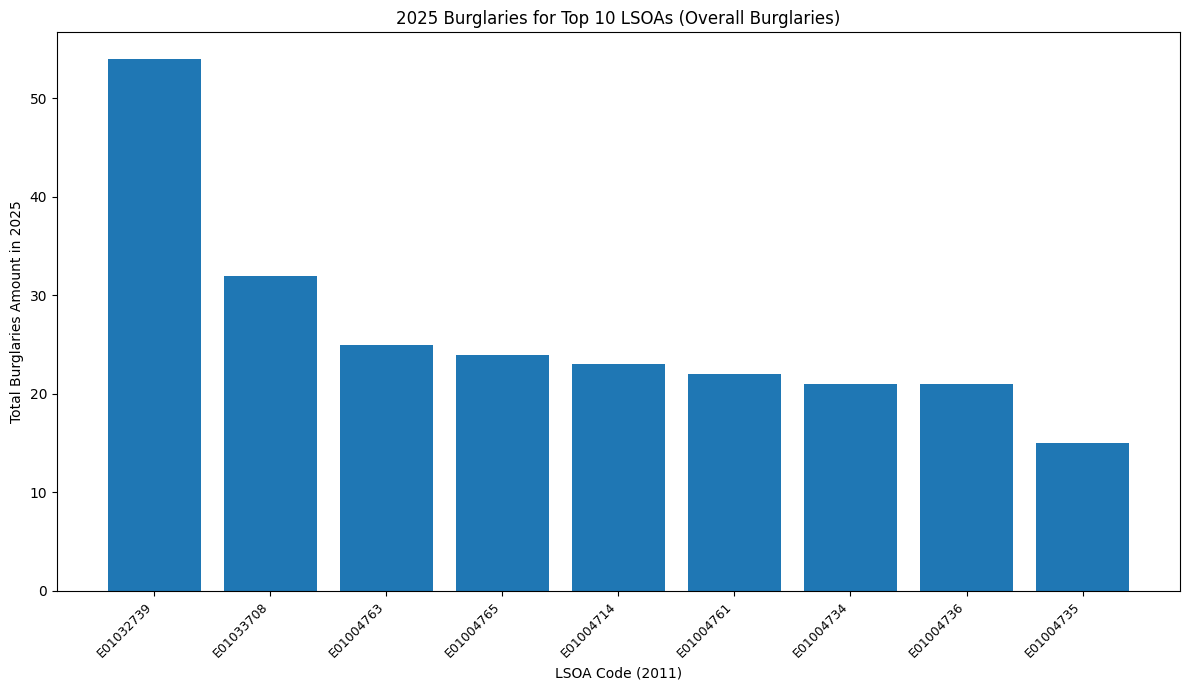

In [62]:
import matplotlib.pyplot as plt

# --- Step 1: Find the top 10 LSOAs based on OVERALL burglaries ---
overall_burglaries_per_lsoa = street.groupby('LSOA code (2011)', observed=True)['Burglaries amount'].sum().reset_index()

# Get the codes of the top 10 LSOAs by overall burglaries
top_10_overall_lsoa_codes = overall_burglaries_per_lsoa.sort_values(
    by='Burglaries amount', ascending=False
).head(10)['LSOA code (2011)'].tolist()


# --- Step 2: Filter for 2025 data and calculate burglaries for ONLY these top 10 LSOAs ---
burglaries_2025 = street[street['date'].dt.year == 2025]

# Filter 2025 data to include only the LSOA codes identified as overall top 10
burglaries_2025_for_top_overall_lsoas = burglaries_2025[
    burglaries_2025['LSOA code (2011)'].isin(top_10_overall_lsoa_codes)
]

# Group by LSOA and sum burglaries for these specific LSOAs in 2025
final_plot_data = burglaries_2025_for_top_overall_lsoas.groupby(
    'LSOA code (2011)', observed=True
)['Burglaries amount'].sum().reset_index()

# Sort the final plot data by their 2025 burglary amount for clear visualization in the plot
final_plot_data = final_plot_data.sort_values(by='Burglaries amount', ascending=False)

# --- Plotting the data ---
plt.figure(figsize=(12, 7)) # Increased width for better label spacing

plt.bar(
    x=final_plot_data['LSOA code (2011)'], # This uses the LSOA codes directly as x-axis labels
    height=final_plot_data['Burglaries amount']
)

plt.title('2025 Burglaries for Top 10 LSOAs (Overall Burglaries)')
plt.xlabel('LSOA Code (2011)')
plt.ylabel('Total Burglaries Amount in 2025')

# Rotate and adjust font size for x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.tight_layout() # Adjust layout to ensure everything fits

plt.show()